In [8]:
import librosa
import numpy as np
from scipy.signal import stft
def spectrum_fast(x, nperseg=512, noverlap=128, window='hamming', cut_dc=True,
                  output_phase=False, cut_last_timeframe=True):
    '''
    Compute magnitude spectra from monophonic signal
    '''

# f, t, seg_stft = stft(x,
    #                       window=window,
    #                       nperseg=nperseg,
    #                       noverlap=noverlap)
    seg_stft = []

    for channel in range(x.shape[0]):
        seg_stft.append(librosa.stft(x[channel], n_fft=nperseg, hop_length=noverlap))
    seg_stft = np.array(seg_stft)
    
    output = np.abs(seg_stft)

    if output_phase:
        phase = np.angle(seg_stft)
        output = np.concatenate((output, phase), axis=-3)

    if cut_dc:
        output = output[:, 1:, :]

    if cut_last_timeframe:
        output = output[:, :, :-1]

    # return np.rot90(np.abs(seg_stft))
    return output




In [9]:
x, sr = librosa.load("demo_With_Streamlit/test_sample/split0_ov1_0_A.wav", sr=32000, mono=False)
x1 = spectrum_fast(x, nperseg=512, noverlap=128, 
                  window="hamming", output_phase=False)



(4, 256, 7500)


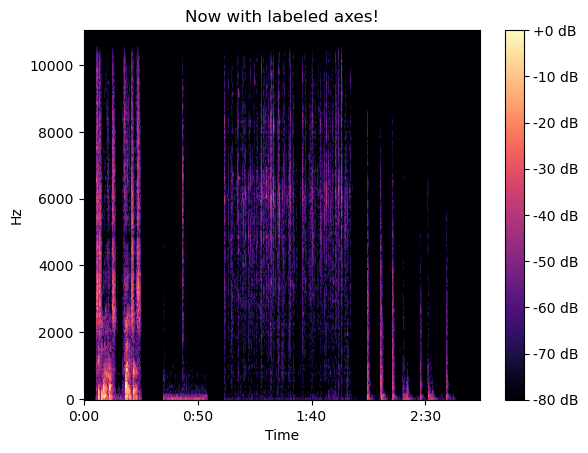

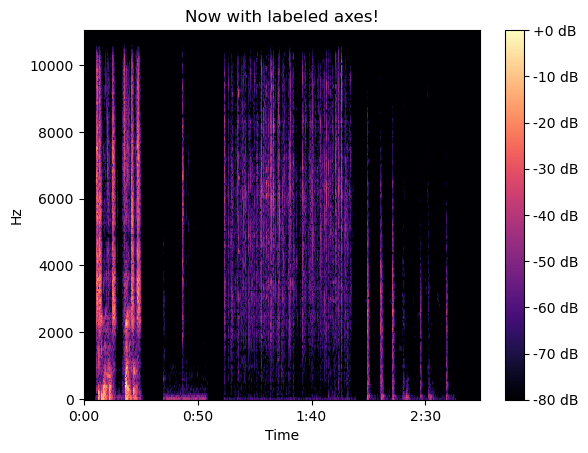

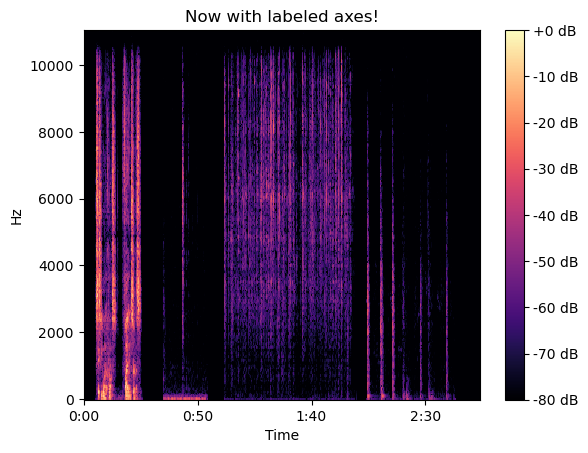

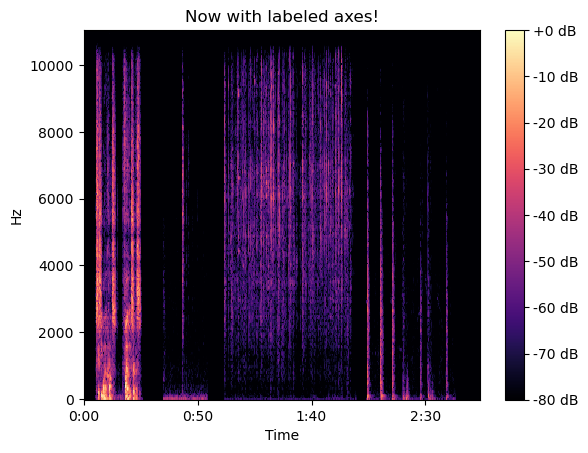

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

print(x1.shape)

for channel in range(x1.shape[0]):
    S_db = librosa.amplitude_to_db(x1[channel], ref=np.max)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title='Now with labeled axes!')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

(257, 7501)
(257, 7501)
(257, 7501)
(257, 7501)


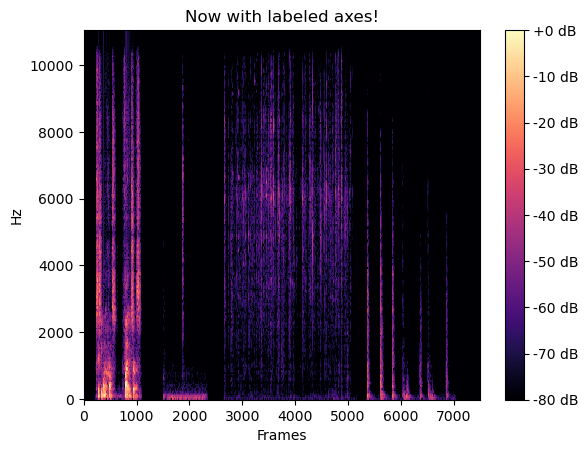

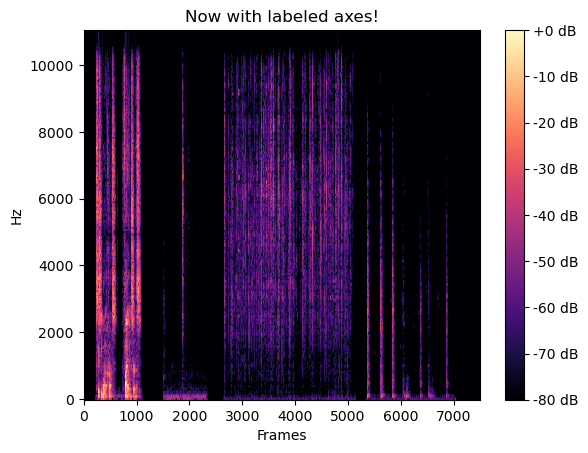

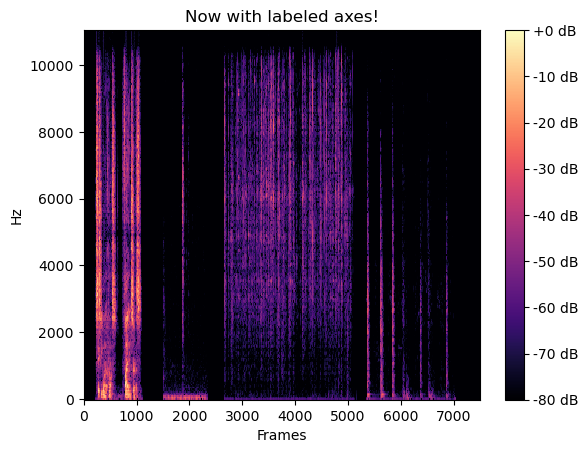

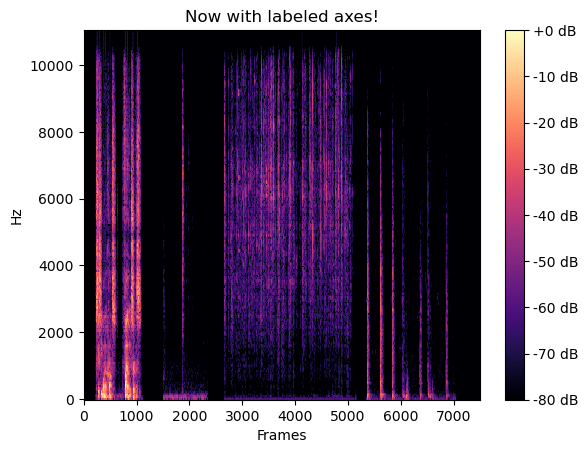

In [4]:
x2, sr = librosa.load("demo_With_Streamlit/test_sample/split0_ov1_0_A.wav", sr=32000, mono=False)


for channel in range(x2.shape[0]):
    seg_stft = librosa.stft(x2[channel],n_fft=512, hop_length=128,window="hamming")
    print(seg_stft.shape)
    S_db = librosa.amplitude_to_db(np.abs(seg_stft), ref=np.max)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_db, x_axis='frames', y_axis='linear', ax=ax)
    ax.set(title='Now with labeled axes!')
    fig.colorbar(img, ax=ax, format="%+2.f dB")


In [23]:
import random
def draw_item(x_item,y_item,name_item):
    x_rand = random.uniform(x_item-0.25, x_item+0.25)
    y_rand = random.uniform(y_item-0.25, y_item+0.25)
    ax.scatter(x_rand,y_rand,c='r',s=200)
    ax.annotate(name_item,(x_item,y_item),size= 20)

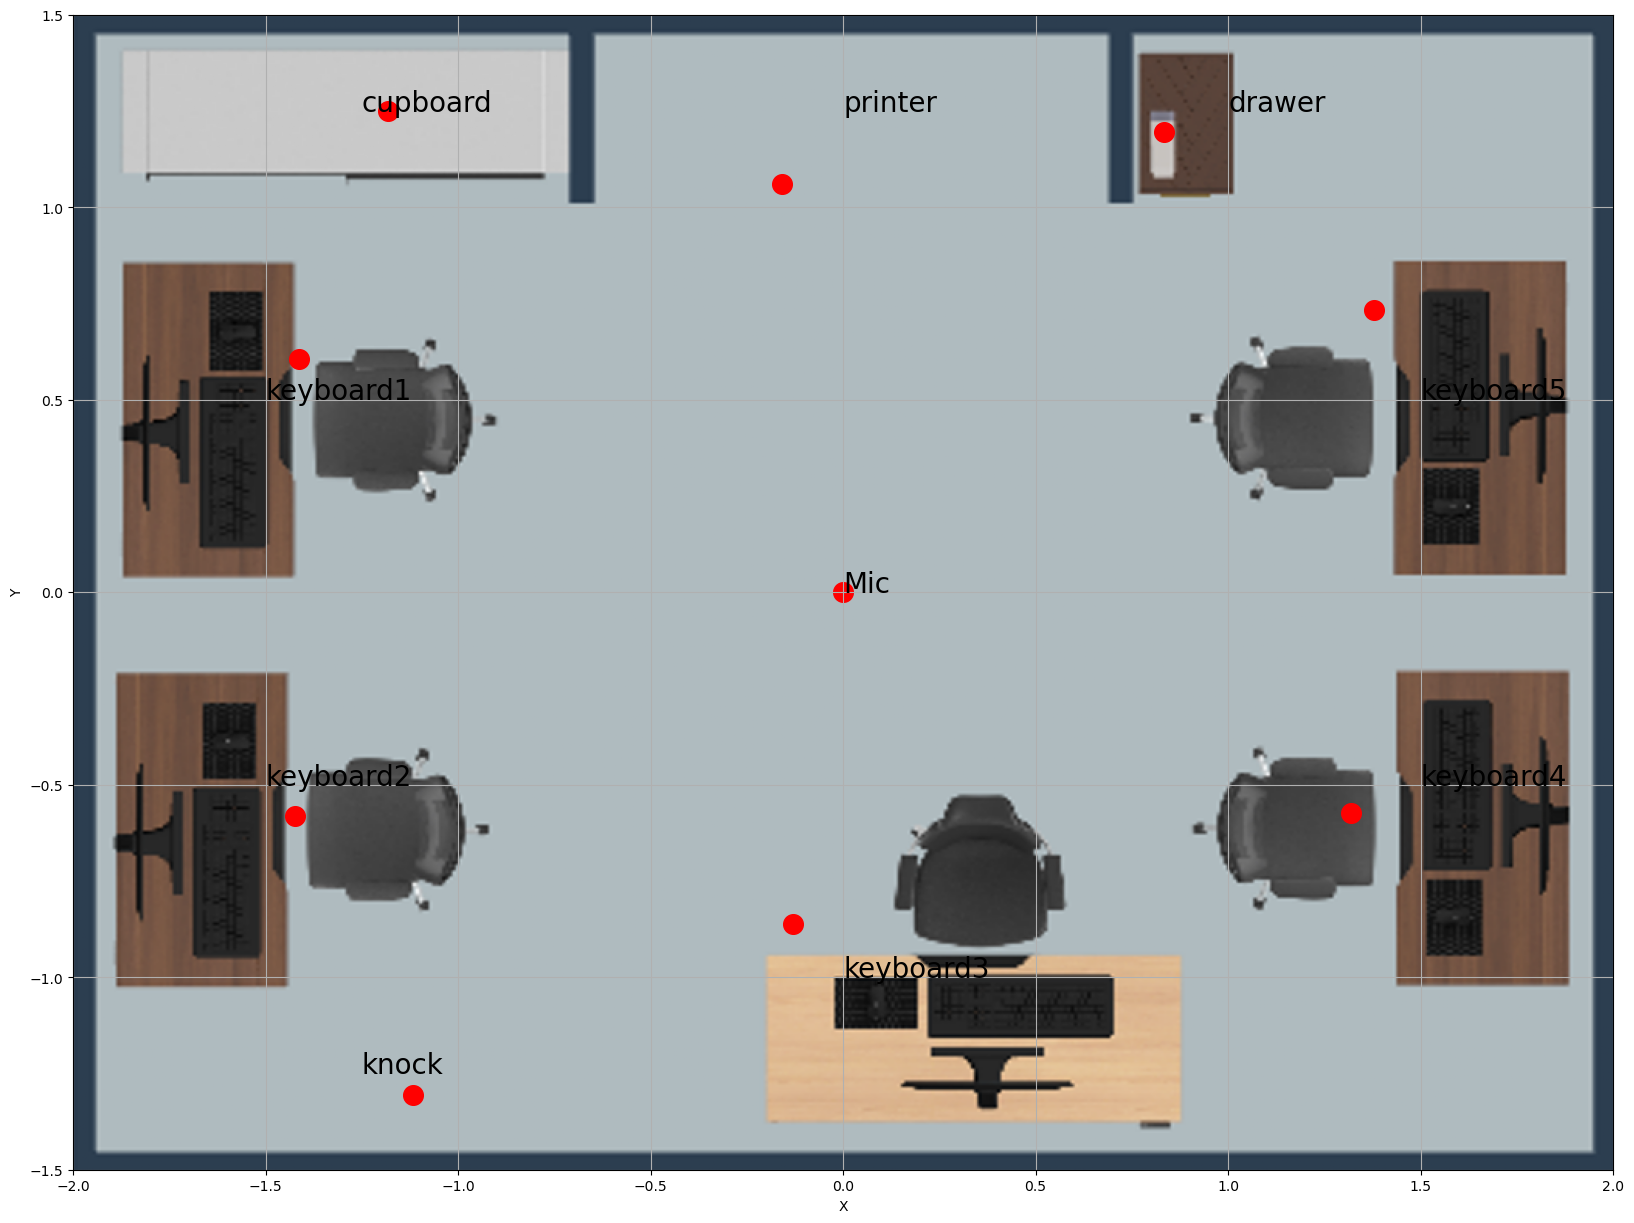

In [25]:
import storage_params as sp
 


fig,ax = plt.subplots(figsize=(20,15)) 
background = plt.imread(sp.background_path)
size=20

#set x,y coordination
x_max = 2
x_min = -2
y_max = 1.5
y_min = -1.5


# marking the x-axis and y-axis

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.imshow(background,extent=[x_min,x_max,
                            y_min,y_max])
ax.grid()
#x, , name, = next(self.stream)
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.scatter(0,0,c='r',s=200)
ax.annotate("Mic",(0,0),size= size)

#cupboard

draw_item(-1.25,1.25,"cupboard")

#drawer
draw_item(1.0,1.25,"drawer")

#computer
draw_item(-1.5,0.5,"keyboard1")
draw_item(-1.5,-0.5,"keyboard2")
draw_item(0.0,-1.0,"keyboard3")
draw_item(1.5,-0.5,"keyboard4")
draw_item(1.5,0.5,"keyboard5")

#printer 
draw_item(0.0,1.25,"printer")

#knock
draw_item(-1.25,-1.25,"knock")






In [1]:

fixed_location = {
            'Computer keyboard': 
                [(-1.5,0.5),(-1.5,-0.5),(0.0,-1.0),(1.5,-0.5),(1.5,0.5)],
            'cupboard open/close': (-1.25,1.25),
            'Drawer open/close': (1.0,1.25),
            'Printer': (0.0,1.25),
            'Knock': (-1.25,-1.25)    
        }

name = fixed_location.keys()

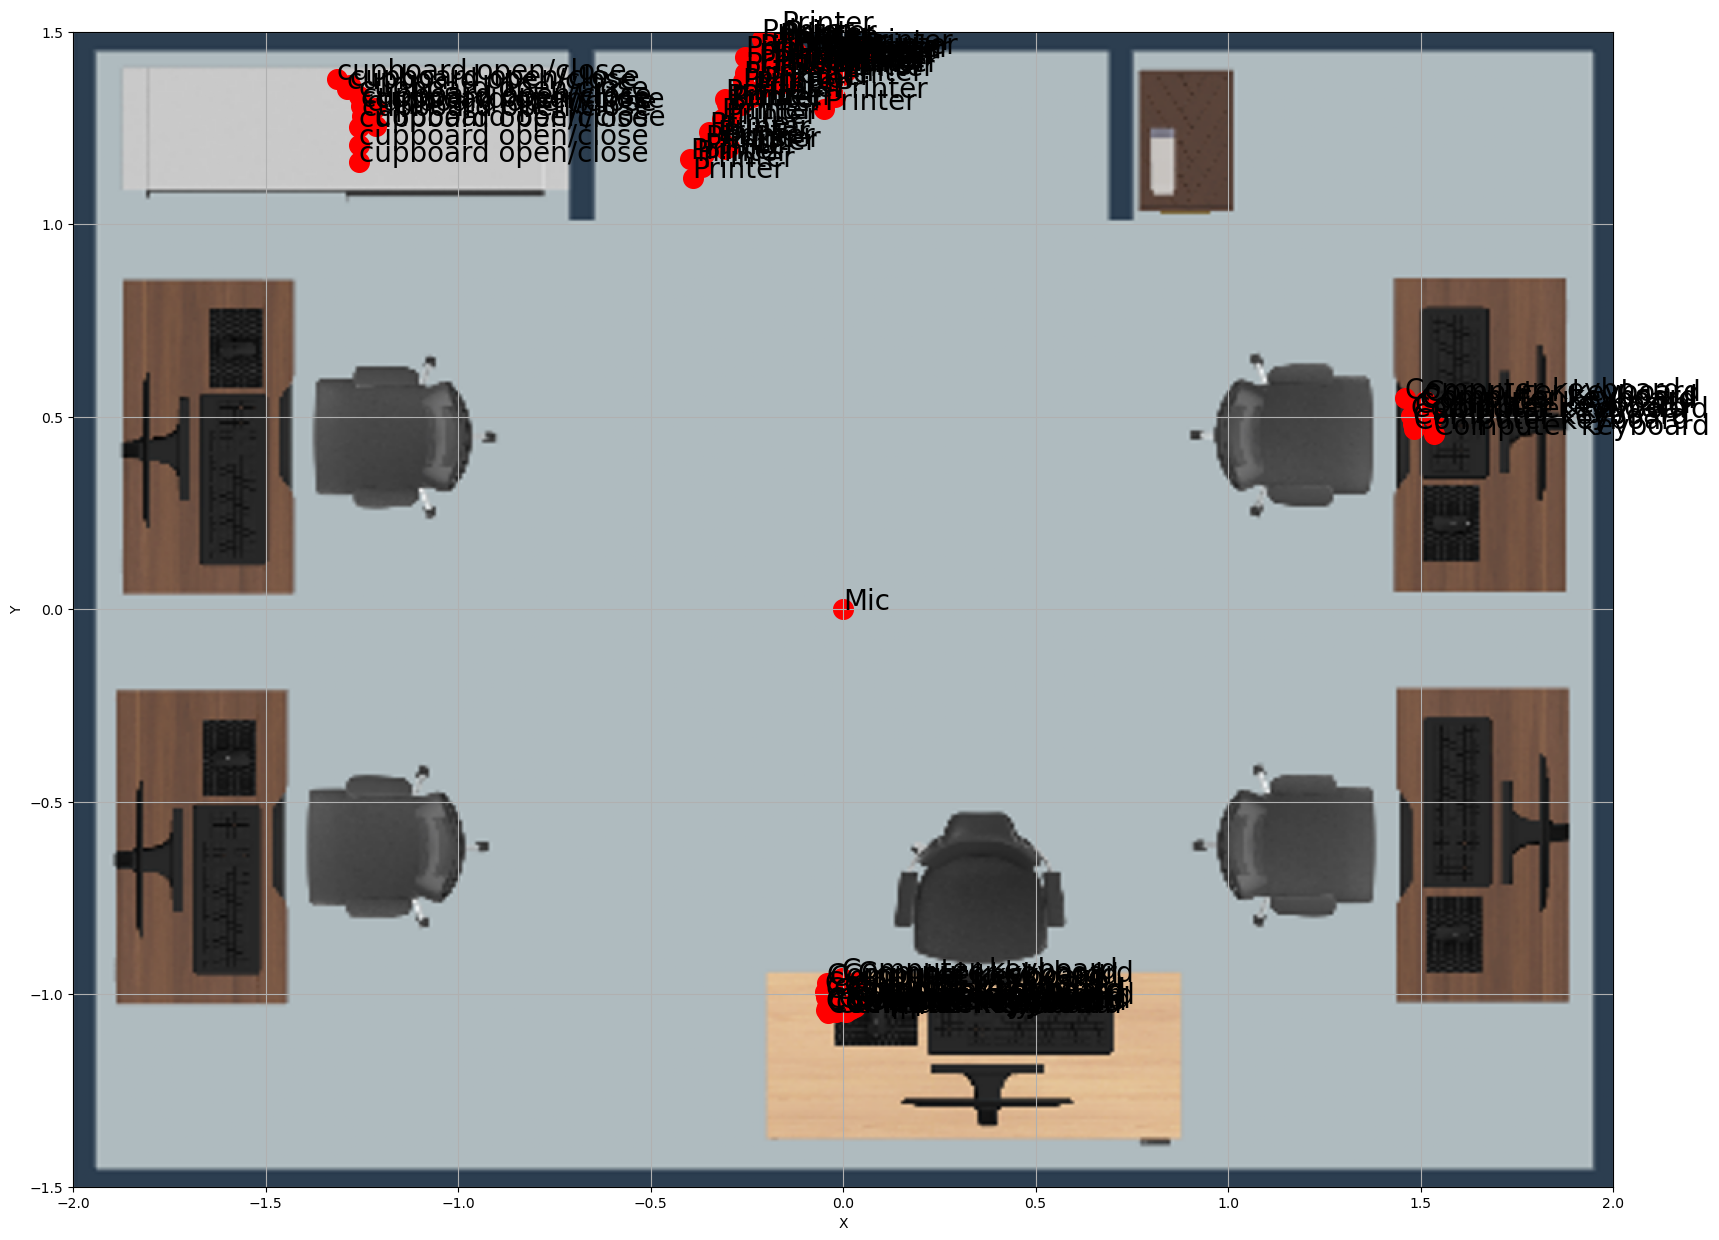

In [10]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import storage_params as sp
import math

df = pd.read_csv("test.csv")
df["Class Name"][0]

def plot_scatter(x,y,name):
    ax.scatter(x,y,c='r',s=200)
    ax.annotate(name,(x,y),size= 20)

def random_inrange(x_item,y_item):
        x = random.uniform(x_item-0.05, x_item+0.05)
        y= random.uniform(y_item-0.05, y_item+0.05)
        return x,y

fig,ax = plt.subplots(figsize=(20,15)) 
background = plt.imread(sp.background_path)
size=20

#set x,y coordination
x_max = 2
x_min = -2
y_max = 1.5
y_min = -1.5


# marking the x-axis and y-axis

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.imshow(background,extent=[x_min,x_max,
                            y_min,y_max])
ax.grid()
#x, , name, = next(self.stream)
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
plot_scatter(0,0,"Mic")

def get_closet_distance(x_raw,y_raw):
    seed_coors =fixed_location.get("Computer keyboard")
    #print(seed_coors)
    #print(type(seed_coors))
    raw_coor =(x_raw,y_raw)
    dest_coor = (0,0)
    min_dist = math.dist(seed_coors[0],raw_coor)
    for i,coor in enumerate(seed_coors):
        temp_dist= math.dist(coor,raw_coor)
        if min_dist > temp_dist:
            min_dist = temp_dist
            dest_coor = coor
        #print(coor)
        #print(temp_dist)
           
    return dest_coor
    
    
temp = (0,0)
detect = False
for i in range(len(df)-1):
    if df['Class Name'][i] == "Computer keyboard":
        #plot_scatter(df['X'][i],df['Y'][i],df['Class Name'][i])
        x,y = get_closet_distance(df['X'][i],df['Y'][i])
        df.at[i,'X'],df.at[i,'Y'] = random_inrange(x,y)
        #plot_scatter(x,y,df['Class Name'][i])
        #print(x,y)
        continue
    
    
    # if df['Class Name'][i] in name:
    #     x,y = fixed_location.get(df['Class Name'][i])
    #     df['X'][i],df['Y'][i] = random_inrange(x,y)
    #     print(df['Class Name'][i])
    if df['Class Name'][i] in name and detect == False:
        x,y = fixed_location.get(df['Class Name'][i])
        df.at[i,'X'],df.at[i,'Y'] = random_inrange(x,y)
        temp = df.at[i,'X'],df.at[i,'Y']
        detect = True
        #print(df['Class Name'][i-1]== df['Class Name'][i])
        #print(type(df['Class Name'][i]))
        #break
    elif (df['Class Name'][i] == df['Class Name'][i+1]) and detect:
        x,y= temp
        df.at[i,'X'],df.at[i,'Y'] = random_inrange(x,y)
        temp = df.at[i,'X'],df.at[i,'Y'] 
        detect = False
        
    else:
        x,y= temp
        df.at[i,'X'],df.at[i,'Y'] = random_inrange(x,y)
        temp = df.at[i,'X'],df.at[i,'Y']
        
        
#check last index
if df['Class Name'][i] in fixed_location.keys():
    x,y = fixed_location.get(df['Class Name'][i])
    df.at[i,'X'],df.at[i,'Y'] = random_inrange(x,y)
    print("i'm here")
    #self.detect = True
        

    
for i in range(len(df)):
    if df['Class Name'][i] in name:
        plot_scatter(df['X'][i],df['Y'][i],df['Class Name'][i])
            

In [3]:

import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
import subprocess

def testSubprocess(x, y):

    #set up the figure
    fig = plt.figure(figsize=(15, 9))
    canvas_width, canvas_height = fig.canvas.get_width_height()

    # First frame
    ax0 = plt.plot(x,y)
    pointplot, = plt.plot(x[0], y[0], 'or')

    def update(frame):
        # your matplotlib code goes here
        pointplot.set_data(x[frame],y[frame])

    # Open an ffmpeg process
    outf = 'testSubprocess.mp4'
    cmdstring = ('ffmpeg', 
                 '-y', '-r', '1', # overwrite, 1fps
                 '-s', '%dx%d' % (canvas_width, canvas_height), # size of image string
                 '-pix_fmt', 'argb', # format
                 '-f', 'rawvideo',  '-i', '-', # tell ffmpeg to expect raw video from the pipe
                 '-vcodec', 'mpeg4', outf) # output encoding
    p = subprocess.Popen(cmdstring, stdin=subprocess.PIPE)

    # Draw frames and write to the pipe
    for frame in range(nframes):
        # draw the frame
        update(frame)
        fig.canvas.draw()

        # extract the image as an ARGB string
        string = fig.canvas.tostring_argb()

        # write to pipe
        p.stdin.write(string)

    # Finish up
    p.communicate()

998
